# Homework 1

## Assignment overview
This problem set deals with matrial from the first four lectures. You may reference any materials, but make sure if you directly copy code, that you provide a link to the source in the mark up. Likewise, if you find a really helpful website, you should add that link as well.

Work from this notebook and submit a copy of this notebook via canvas.  Include any additional scripts or files needed to reproduce.

## Import requried modules

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
import homework as hw # see homework.py file
import pywt

## Problem 1

- Load the `Pitt_Cathedral.jpg` file from the `Data` folder as a color image
- Convert the image colors to display using the imshow() command 
- Convert the image to Grayscale and display the image again

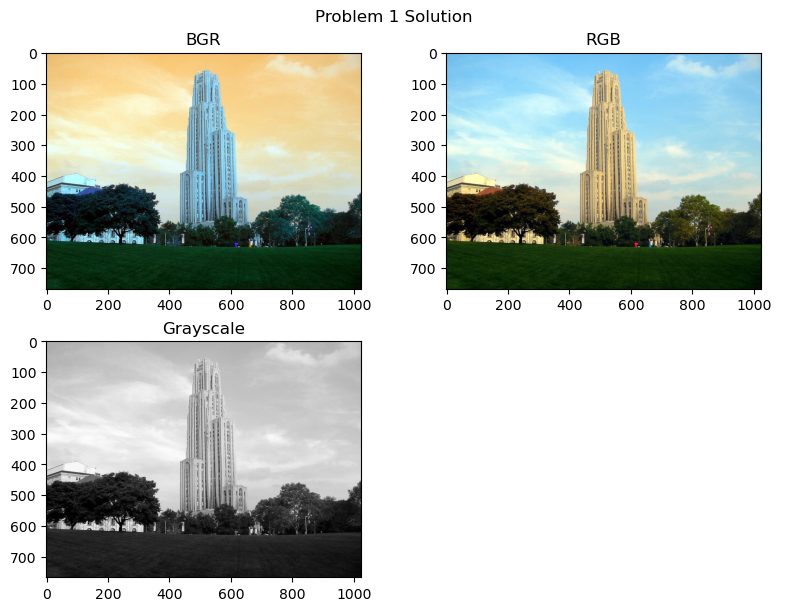

In [2]:
# read in the image
img = cv2.imread(os.path.relpath('Data/Pitt_Cathedral.jpg'), cv2.IMREAD_COLOR)

# convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show the results
fig, axs = plt.subplots(2, 2, figsize=(8,6), layout='constrained')
fig.suptitle('Problem 1 Solution')
axs[0,0].imshow(img); axs[0,0].set_title('BGR')
axs[0,1].imshow(img_rgb); axs[0,1].set_title('RGB')
axs[1,0].imshow(img_gray, cmap='gray', vmin=0, vmax=255); axs[1,0].set_title('Grayscale')
axs[1,1].axis('off')
plt.show()

## Problem 2

- Annotate the Cathedral image from Problem 1 with the slogan "Hail to Pitt" placed in the image
- In a different font and color, add your name in text to the same image
- Crop the image around the Cathedral and display the image

__Annotate the Cathedral image from [Problem 1](#problem-1) with the slogan "Hail to Pitt" placed in the image.__

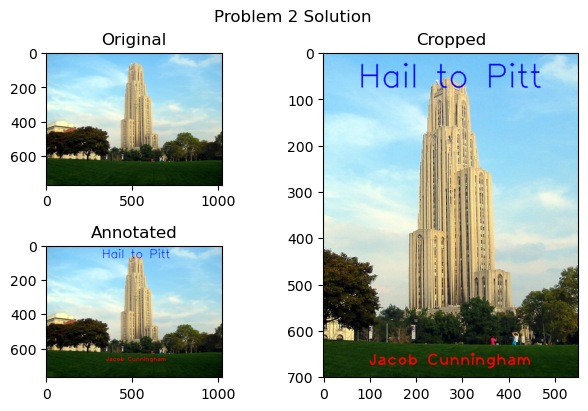

In [3]:
# create a copy of the image
img_annotated = img_rgb.copy()

# H2P text
h2p = {
    'text': 'Hail to Pitt',
    'scale': 2.3,
    'face': cv2.FONT_HERSHEY_SIMPLEX,
    'color': (0, 0, 255), # blue
    'thickness': 2,
    'origin': (325, 75),
    'lineType': cv2.LINE_AA
}

# annotate the image
cv2.putText(
    img_annotated, 
    h2p['text'],
    h2p['origin'],
    h2p['face'],
    h2p['scale'],
    h2p['color'],
    h2p['thickness'],
    h2p['lineType']
)

# Name text
name = {
    'text': 'Jacob Cunningham',
    'scale': h2p['scale'],
    'face': cv2.FONT_HERSHEY_PLAIN,
    'color': (255, 0, 0), # red
    'thickness': h2p['thickness'],
    'origin': (350, 675),
    'lineType': h2p['lineType']
}

# annotate the image
cv2.putText(
    img_annotated, 
    name['text'],
    name['origin'],
    name['face'],
    name['scale'],
    name['color'],
    name['thickness'],
    name['lineType']
)

# crop the image
img_cropped = img_annotated.copy()[0:701, 250:801]

# show the image
fig, axd = plt.subplot_mosaic([['Original', 'Cropped'], ['Annotated', 'Cropped']], figsize=(6, 4), layout='constrained')
fig.suptitle('Problem 2 Solution')
axd['Original'].imshow(img_rgb); axd['Original'].set_title('Original')
axd['Annotated'].imshow(img_annotated); axd['Annotated'].set_title('Annotated')
axd['Cropped'].imshow(img_cropped); axd['Cropped'].set_title('Cropped')
plt.show()

## Problem 3

- Create a binary mask seperating the blue sky by thresholding
- Using this mask, change (just the) sky to be a deeper blue 

__Create a binary mask separating the blue sky by thresholding.__

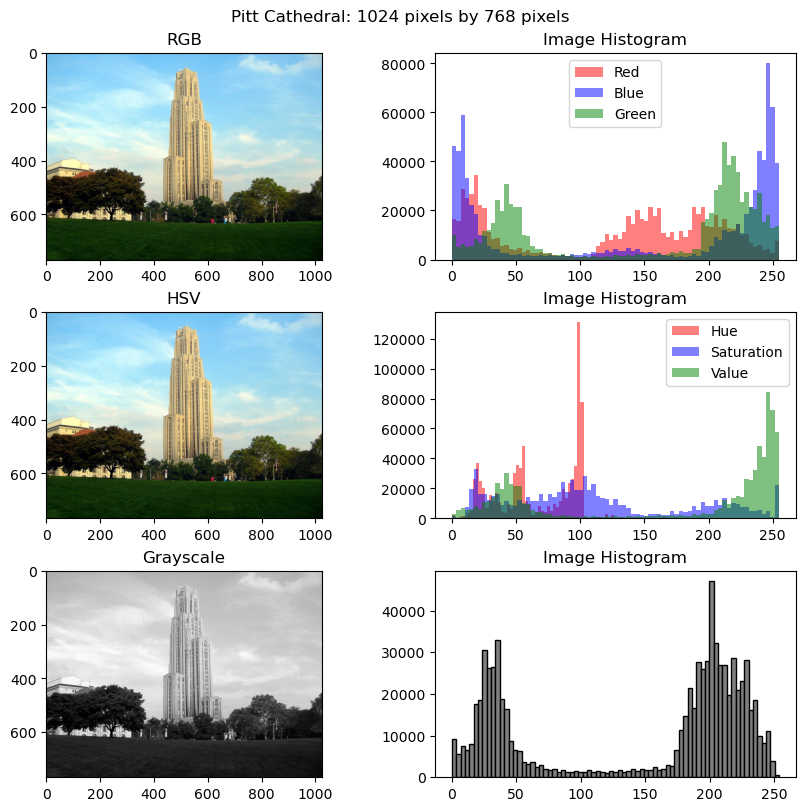

In [4]:
# get the image size
height, width = img.shape[:2]

# convert to hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# split the color channels
r, g, b = cv2.split(img_rgb)
h, s, v = cv2.split(img_hsv)

# plot the images and their histograms
fig, axs = plt.subplots(3, 2, figsize=(8,8), layout='constrained')
axs[0,0].imshow(img_rgb)
axs[0,0].set_title('RGB')
axs[0,1].hist(r.ravel(), bins=75, color='red', alpha=0.5, label='Red')
axs[0,1].hist(b.ravel(), bins=75, color='blue', alpha=0.5, label='Blue')
axs[0,1].hist(g.ravel(), bins=75, color='green', alpha=0.5, label='Green')
axs[0,1].legend()
axs[0,1].set_title('Image Histogram')
axs[1,0].imshow(img_rgb)
axs[1,0].set_title('HSV') # since RGB required for matplotlib
axs[1,1].hist(h.ravel(), bins=75, color='red', alpha=0.5, label='Hue')
axs[1,1].hist(s.ravel(), bins=75, color='blue', alpha=0.5, label='Saturation')
axs[1,1].hist(v.ravel(), bins=75, color='green', alpha=0.5, label='Value')
axs[1,1].legend()
axs[1,1].set_title('Image Histogram')
axs[2,0].imshow(img_gray, cmap='gray', vmin=0, vmax=255)
axs[2,0].set_title('Grayscale')
axs[2,1].hist(img_gray.ravel(), bins=75, color='gray', edgecolor='black')
axs[2,1].set_title('Image Histogram')
fig.suptitle(f'Pitt Cathedral: {width} pixels by {height} pixels')
plt.show()

:::{note}
The grayscale image is bimodal which indicates segmentation by thresholding may be a good approach.
:::

### Create a binary mask

#### Sample of threshold approaches

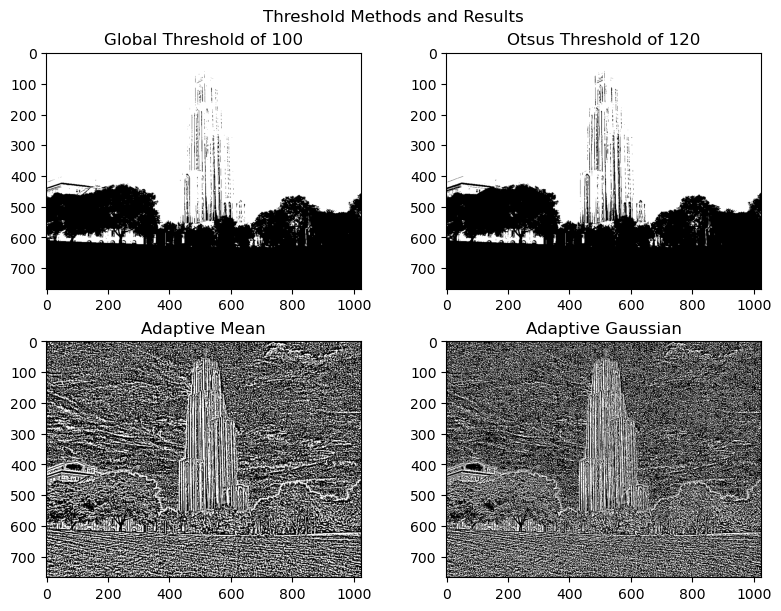

In [5]:
# global method
val_global, img_global = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)

# Otsus method
val_otsus, img_otsus = cv2.threshold(img_gray, 167, 255, cv2.THRESH_OTSU)

# adaptive thresholds
img_adpt_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 0)
img_adpt_gauss = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 0)

# show the results
fig, axs = plt.subplots(2, 2, figsize=(8,6), layout='constrained')
fig.suptitle('Threshold Methods and Results')
axs[0,0].imshow(img_global, cmap='gray', vmin=0, vmax=255); axs[0,0].set_title(f'Global Threshold of {val_global:.0f}')
axs[0,1].imshow(img_otsus, cmap='gray', vmin=0, vmax=255); axs[0,1].set_title(f'Otsus Threshold of {val_otsus:.0f}')
axs[1,0].imshow(img_adpt_mean, cmap='gray', vmin=0, vmax=255); axs[1,0].set_title('Adaptive Mean')
axs[1,1].imshow(img_adpt_gauss, cmap='gray', vmin=0, vmax=255); axs[1,1].set_title('Adaptive Gaussian')
plt.show()

#### Finetuning

In [6]:
# script used to finetune threshold value
hw.finetune_threshold(img_rgb)

interactive(children=(IntSlider(value=167, continuous_update=False, description='Threshold:', max=255), Output…

#### Select threshold value

In [9]:
thresh_selected = 167

### Change the sky to a darker color

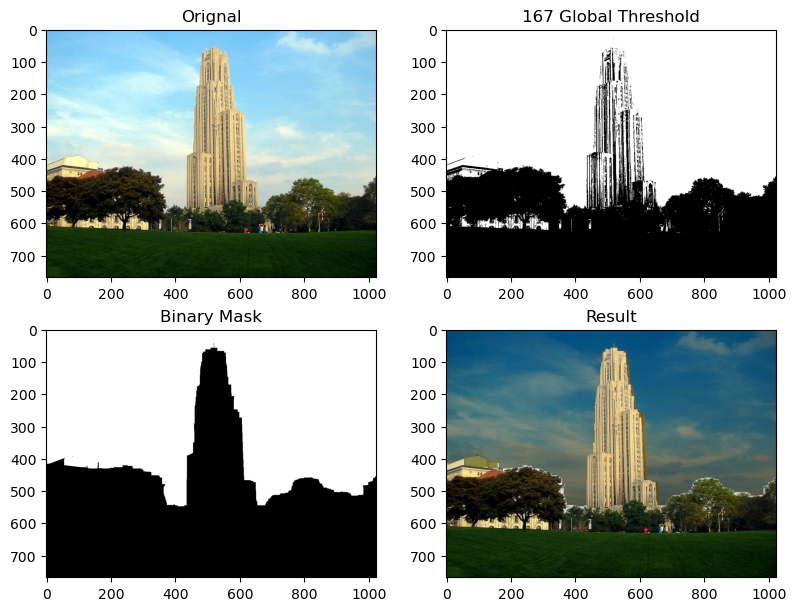

In [10]:
# Make the sky darker
darker_array = np.ones(img_rgb.shape, dtype='uint8') * 120
darker_sky =  cv2.subtract(img_rgb, darker_array)

# Threshold the image based on finetuning
_, img_thresh = cv2.threshold(img_gray, thresh_selected, 255, cv2.THRESH_BINARY)

# Make the kernel, small size used to caputure fine details
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)

# perform opening
background_mask = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel, iterations=10)

# perform bitwise operations
foreground_mask = cv2.bitwise_not(background_mask)
new_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=foreground_mask)
new_background = cv2.bitwise_and(darker_sky, darker_sky, mask=background_mask)

# add the background and foreground
result = cv2.add(new_background, new_foreground)

# show the result
fig, axs = plt.subplots(2, 2, figsize=(8, 6), layout='constrained')
axs[0,0].imshow(img_rgb); axs[0,0].set_title('Orignal')
axs[0,1].imshow(img_thresh, cmap='gray', vmin=0, vmax=255); axs[0,1].set_title(f'{thresh_selected:.0f} Global Threshold')
axs[1,0].imshow(background_mask, cmap='gray', vmin=0, vmax=255); axs[1,0].set_title('Binary Mask')
axs[1,1].imshow(result); axs[1,1].set_title('Result')
plt.show()

## Problem 4

Write a function to preform a median filter operation using an arbitrary kernel (taken as a second argument).  The median filter should compute the median value from the pixels in the kernel and replace the value at the kernel anchor (center).

__`homework.py` contains the function.__

### Implementation

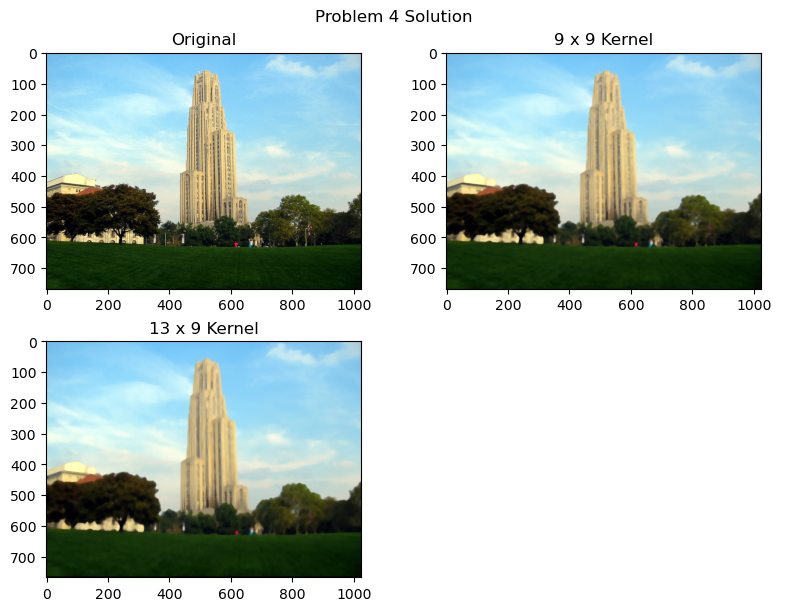

In [11]:
# define kernels
square_kernel = 9
kernel_width = 9
kernel_height = 13

# pass to median filter
img_median_filter_square = hw.median_filter_arbitrary(img_rgb, square_kernel)
img_median_filter_rect = hw.median_filter_arbitrary(img_rgb, (kernel_height, kernel_width))

# show results
fig, axs = plt.subplots(2, 2, figsize=(8, 6), layout='constrained')
fig.suptitle('Problem 4 Solution')
axs[0,0].imshow(img_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(img_median_filter_square)
axs[0,1].set_title(f'{square_kernel:.0f} x {square_kernel:.0f} Kernel')
axs[1,0].imshow(img_median_filter_rect)
axs[1,0].set_title(f'{kernel_height:.0f} x {kernel_width:.0f} Kernel')
axs[1,1].axis('off')
plt.show()

## Problem 5 [ECE 2690 students]
* Using the Haar wavelet, compress the color image by 25% removing only the high/high-pass component

__`homework.py` contains the function__

### Implementation

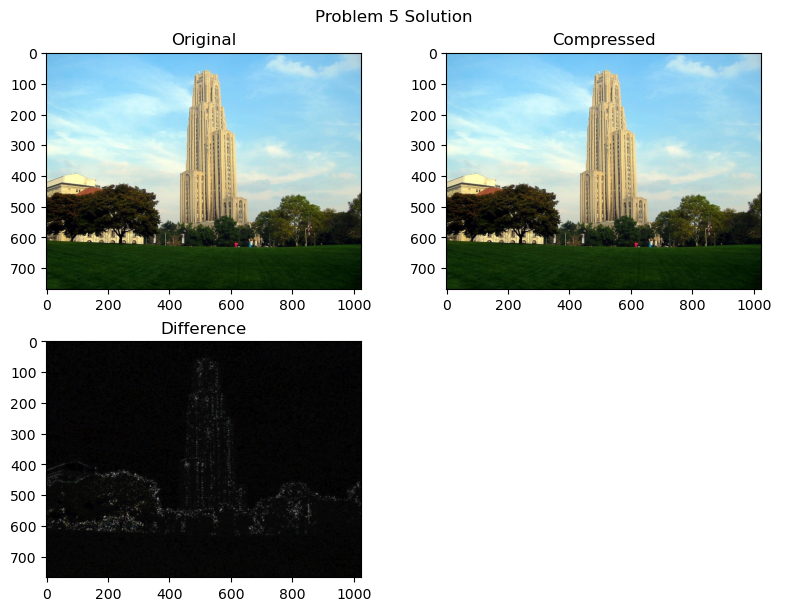

In [12]:
# compress the image
img_compressed = hw.compress_image_haar(img_rgb, compression_rate=0.25)

# get the size of each image
img_rgb_size = img_rgb.size
img_compressed_size = img_compressed.size

# Show the differences in the images
difference = np.abs(img_rgb.astype(np.float32) - img_compressed.astype(np.float32))

# show the image
fig, axs = plt.subplots(2, 2, figsize=(8,6), layout='constrained')
fig.suptitle('Problem 5 Solution')
axs[0,0].imshow(img_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(img_compressed); axs[0,1].set_title('Compressed')
axs[1,0].imshow(difference / np.max(difference))
axs[1,0].set_title('Difference')
axs[1,1].axis('off')
plt.show()